In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [7]:
data= pd.read_csv("Shill Bidding Dataset.csv")
data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [8]:
data.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [10]:
df=data.drop(columns=["Record_ID","Bidder_ID","Auction_ID"],axis=1)
for col in list(df.columns):
    print(data[col].value_counts())

Bidder_Tendency
0.250000    190
0.200000    186
0.500000    162
0.000000    153
0.333333    142
           ... 
0.078431      1
0.578947      1
0.311111      1
0.434783      1
0.104478      1
Name: count, Length: 489, dtype: int64
Bidding_Ratio
0.166667    233
0.200000    211
0.083333    189
0.125000    180
0.111111    175
           ... 
0.785714      1
0.480000      1
0.727273      1
0.189189      1
0.372093      1
Name: count, Length: 400, dtype: int64
Successive_Outbidding
0.0    5478
1.0     469
0.5     374
Name: count, dtype: int64
Last_Bidding
0.000023    29
0.000012    25
0.000010    19
0.000081    17
0.000008    17
            ..
0.000804     1
0.298623     1
0.814917     1
0.022486     1
0.012824     1
Name: count, Length: 5807, dtype: int64
Auction_Bids
0.000000    2823
0.142857     208
0.250000     166
0.419355     166
0.280000     158
0.052632     149
0.100000     143
0.333333     143
0.307692     127
0.217391     122
0.454545     120
0.379310     117
0.485714     116
0.18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bidder_Tendency         6321 non-null   float64
 1   Bidding_Ratio           6321 non-null   float64
 2   Successive_Outbidding   6321 non-null   float64
 3   Last_Bidding            6321 non-null   float64
 4   Auction_Bids            6321 non-null   float64
 5   Starting_Price_Average  6321 non-null   float64
 6   Early_Bidding           6321 non-null   float64
 7   Winning_Ratio           6321 non-null   float64
 8   Auction_Duration        6321 non-null   int64  
 9   Class                   6321 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 494.0 KB


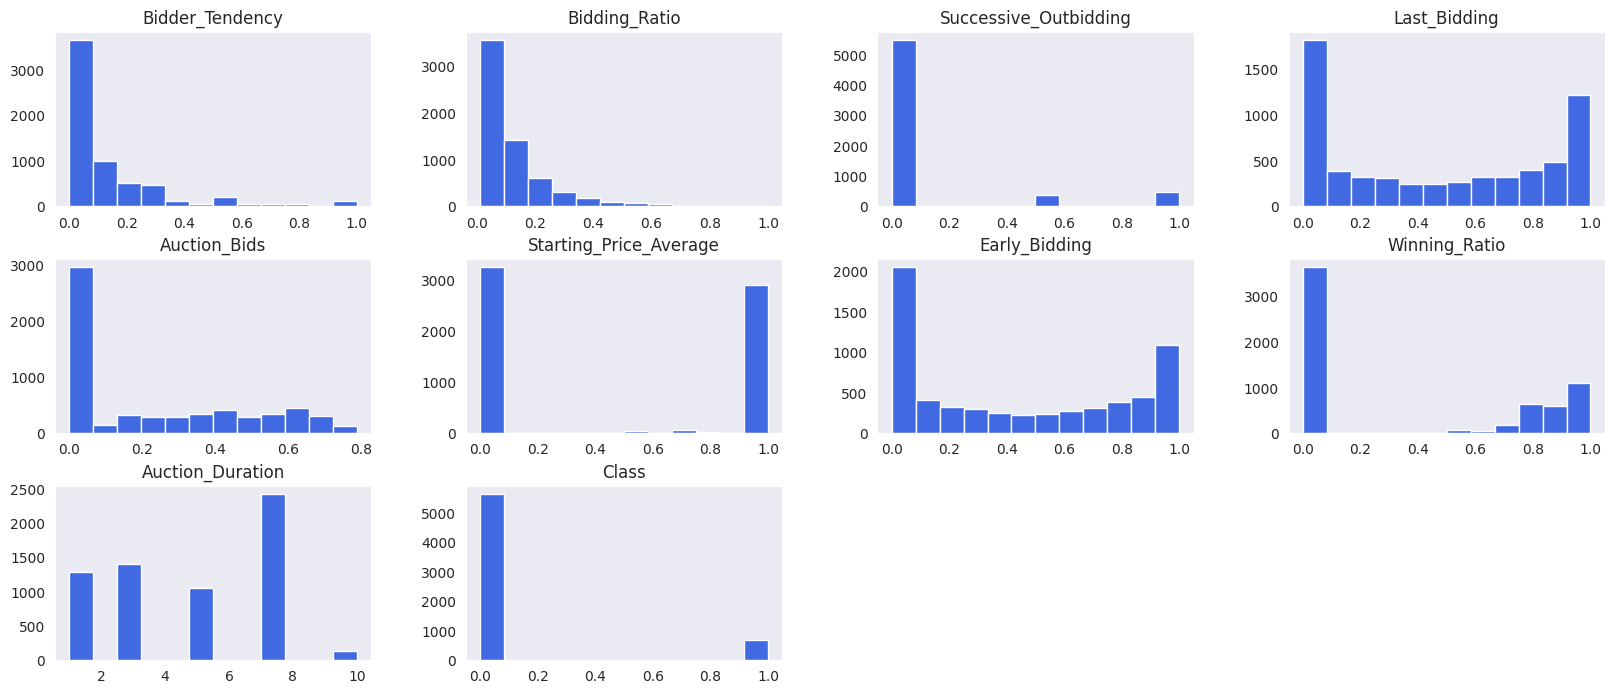

In [27]:
import matplotlib.pyplot as plt
df.info()
df.hist(bins = 12 , layout = (6,4), figsize = (20,17)  ,column = df.columns, grid = False,color="royalblue")
plt.show()

In [20]:
#indepedent variables
X = df.drop("Class",axis=1)
#dependent variable
y = df['Class']
X

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7


In [21]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [23]:
X_train

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
5431,0.111111,0.020833,0.0,0.655849,0.625000,0.935346,0.655849,0.000000,3
5075,0.136364,0.200000,0.5,0.877109,0.000000,0.000000,0.877095,1.000000,5
2633,0.318182,0.518519,1.0,0.996315,0.333333,0.546967,0.996306,0.937500,5
4220,0.016529,0.153846,0.0,0.994410,0.000000,0.999935,0.976366,0.818182,1
134,0.250000,0.083333,0.0,0.000463,0.000000,0.000000,0.000463,0.000000,1
...,...,...,...,...,...,...,...,...,...
3772,0.125000,0.023256,0.0,0.709292,0.581395,0.993528,0.709292,0.000000,7
5191,0.019231,0.040000,0.0,0.812326,0.280000,0.000000,0.812326,0.000000,5
5226,0.017241,0.083333,0.0,0.659924,0.000000,0.000000,0.659924,0.000000,7
5390,0.125000,0.142857,0.0,0.088314,0.000000,0.000000,0.088314,0.714286,3


In [24]:
Y_train

5431    0
5075    1
2633    1
4220    0
134     0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Class, Length: 4235, dtype: int64

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clasif_knn = KNeighborsClassifier(n_neighbors=3)
clasif_knn.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [57]:
knn_predict = clasif_knn.predict(X_test)
k_range = range(1,31)
param_grid = dict(n_neighbors=k_range)

grid= GridSearchCV(clasif_knn,param_grid,cv=10,scoring="accuracy",return_train_score=False,verbose=1)

In [58]:
grid_search= grid.fit(X_train,Y_train)
print(grid_search.best_params_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 3}


In [59]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,knn_predict))
accuracy_score(Y_test,knn_predict)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1876
           1       0.98      0.98      0.98       210

    accuracy                           1.00      2086
   macro avg       0.99      0.99      0.99      2086
weighted avg       1.00      1.00      1.00      2086



0.9961649089165868

In [43]:
from sklearn.svm import SVC
clasif_svc = SVC()
clasif_svc.fit(X_train,Y_train)

SVC()

In [60]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid=GridSearchCV(clasif_svc,param_grid,scoring="accuracy",refit=True,return_train_score=False)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [61]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [45]:
svc_predict = clasif_svc.predict(X_test)
print(classification_report(Y_test,svc_predict))
accuracy_score(Y_test,svc_predict)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1876
           1       0.92      0.98      0.95       210

    accuracy                           0.99      2086
   macro avg       0.96      0.98      0.97      2086
weighted avg       0.99      0.99      0.99      2086



0.9894534995206136

In [38]:
from sklearn.naive_bayes import MultinomialNB
clasif_nb = MultinomialNB(alpha=1.0,fit_prior=True)
clasif_nb.fit(X_train,Y_train)

MultinomialNB()

In [46]:
nb_predict = clasif_nb.predict(X_test)
print(classification_report(Y_test,nb_predict))
accuracy_score(Y_test,nb_predict)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1876
           1       0.93      0.75      0.83       210

    accuracy                           0.97      2086
   macro avg       0.95      0.87      0.91      2086
weighted avg       0.97      0.97      0.97      2086



0.9693192713326941